# San Francisco Fire Department Battalion Response Times

In [1]:
# API query methods from the https://dev.socrata.com/foundry/data.sfgov.org/nuek-vuh3 documentation and examples

# make sure to install these packages if necessary before running API query:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata
import datetime as dt

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.sfgov.org", None)

# establish query date to extract 1 year of data from today's date
date = dt.datetime.now() - dt.timedelta(days=365)
year_ago = date.strftime("%Y-%m-%d")

# Retrieve results from the SFFD data source for all calls in the past year including call date, battalion, received time,
# and on scene time, sorted ascending by call date.
results = client.get_all("nuek-vuh3",
                         where=f"call_date > '{year_ago}T00:00:00.000'",
                         select="call_date, battalion, received_dttm, on_scene_dttm",
                         order="call_date ASC")

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [2]:
# view dataframe created from query results
results_df.head()

,call_date,battalion,received_dttm,on_scene_dttm
0,2020-03-14T00:00:00.000,B09,2020-03-14T20:12:02.000,2020-03-14T20:32:18.000
1,2020-03-14T00:00:00.000,B03,2020-03-14T16:35:48.000,2020-03-14T16:55:40.000
2,2020-03-14T00:00:00.000,B03,2020-03-14T11:53:29.000,2020-03-14T11:59:05.000
3,2020-03-14T00:00:00.000,B03,2020-03-14T10:40:40.000,2020-03-14T10:52:42.000
4,2020-03-14T00:00:00.000,B02,2020-03-14T18:29:15.000,2020-03-14T18:41:05.000


In [3]:
# evaluate column data types
results_df.dtypes

call_date        object
battalion        object
received_dttm    object
on_scene_dttm    object
dtype: object

In [4]:
# drop rows with missing data
refined_df = results_df.dropna(how='any')
refined_df.head()

,call_date,battalion,received_dttm,on_scene_dttm
0,2020-03-14T00:00:00.000,B09,2020-03-14T20:12:02.000,2020-03-14T20:32:18.000
1,2020-03-14T00:00:00.000,B03,2020-03-14T16:35:48.000,2020-03-14T16:55:40.000
2,2020-03-14T00:00:00.000,B03,2020-03-14T11:53:29.000,2020-03-14T11:59:05.000
3,2020-03-14T00:00:00.000,B03,2020-03-14T10:40:40.000,2020-03-14T10:52:42.000
4,2020-03-14T00:00:00.000,B02,2020-03-14T18:29:15.000,2020-03-14T18:41:05.000


In [5]:
# Convert datatype to datetime format for call_date, received_dttm, and on_scene_dttm
refined_df['call_date'] = pd.to_datetime(refined_df['call_date'])
refined_df['received_dttm'] = pd.to_datetime(refined_df['received_dttm'])
refined_df['on_scene_dttm'] = pd.to_datetime(refined_df['on_scene_dttm'])
refined_df.head()

C:\Users\Travis Young\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Travis Young\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Travis Young\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,call_date,battalion,received_dttm,on_scene_dttm
0,2020-03-14,B09,2020-03-14 20:12:02,2020-03-14 20:32:18
1,2020-03-14,B03,2020-03-14 16:35:48,2020-03-14 16:55:40
2,2020-03-14,B03,2020-03-14 11:53:29,2020-03-14 11:59:05
3,2020-03-14,B03,2020-03-14 10:40:40,2020-03-14 10:52:42
4,2020-03-14,B02,2020-03-14 18:29:15,2020-03-14 18:41:05


In [6]:
# establish the month and response time data series
refined_df['month'] = refined_df['call_date'].dt.to_period('M')
refined_df['response_time'] = refined_df['on_scene_dttm'] - refined_df['received_dttm']
refined_df.head()

C:\Users\Travis Young\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Travis Young\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,call_date,battalion,received_dttm,on_scene_dttm,month,response_time
0,2020-03-14,B09,2020-03-14 20:12:02,2020-03-14 20:32:18,2020-03,00:20:16
1,2020-03-14,B03,2020-03-14 16:35:48,2020-03-14 16:55:40,2020-03,00:19:52
2,2020-03-14,B03,2020-03-14 11:53:29,2020-03-14 11:59:05,2020-03,00:05:36
3,2020-03-14,B03,2020-03-14 10:40:40,2020-03-14 10:52:42,2020-03,00:12:02
4,2020-03-14,B02,2020-03-14 18:29:15,2020-03-14 18:41:05,2020-03,00:11:50


In [7]:
# Use describe to get a quick statistical summary of the data
refined_df.describe()

,response_time
count,225457
mean,0 days 00:10:15.723716
std,0 days 00:22:17.334381
min,-1 days +08:02:52
25%,0 days 00:05:30
50%,0 days 00:07:26
75%,0 days 00:11:18
max,1 days 18:41:53


In [8]:
refined_df.dtypes

call_date         datetime64[ns]
battalion                 object
received_dttm     datetime64[ns]
on_scene_dttm     datetime64[ns]
month                  period[M]
response_time    timedelta64[ns]
dtype: object

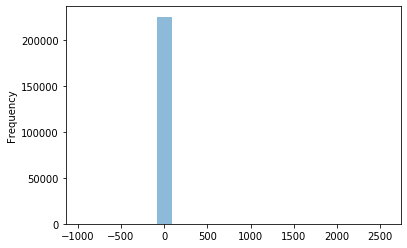

In [9]:
# take a look at the histogram distribution for response time
refined_df['response_time'].astype('timedelta64[m]').plot.hist(bins=20, alpha=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c0a6d680f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c0a6d687f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c0a6cafd30>],
 'medians': [<matplotlib.lines.Line2D at 0x2c0a6d68e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c0a6d7f208>],
 'means': []}

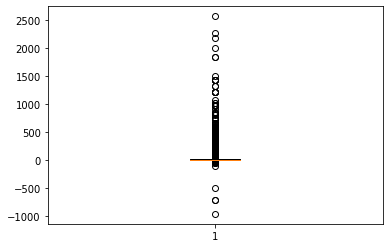

In [10]:
# Have a look at the box plot to assess the data for outliers
import matplotlib.pyplot as plt
plt.boxplot(refined_df['response_time'].astype('timedelta64[m]'))

For this example, the majority of calls have a response time of pretty close to zero minutes as shown by the histogram.  All negative response time data should be removed as it is does not make logical sense to have a response time of less than 0.  The box plot reveals a lot of outliers in the data on the long response time side of the data.  Where most of the data falls within 3 standard deviations of the mean, 77 minutes on the day I ran the analysis, I am going to compare the data using and upper limit of +3 std dev from the mean to an upper limit of 24 hours (1,440 minutes or 86,400 seconds) because the box plot shows a number of values outside the quartile range.  

### Data using a range of 1 second to 3 standard deviations above the mean

In [11]:
# import numpy to find mean and standard deviation for response_time
import numpy as np

In [12]:
# find the mean and standard deviation for the refined dataset
mean = np.mean(refined_df['response_time'])
print(mean)
stdDev = np.std(refined_df['response_time'])
stdDev

0 days 00:10:15.723716


Timedelta('0 days 00:22:17.331415')

In [13]:
# reduce data to response times of at least 1 second up to 3 standard deviations longer than the mean response time
response_df = refined_df[refined_df['response_time'] >= pd.Timedelta(1, 's')]
response_df = response_df[response_df['response_time'] <= pd.Timedelta(1, 'd')]
response_df = response_df[response_df['response_time'] <= pd.Timedelta((3*stdDev+mean), 's')]
response_df.head()

,call_date,battalion,received_dttm,on_scene_dttm,month,response_time
0,2020-03-14,B09,2020-03-14 20:12:02,2020-03-14 20:32:18,2020-03,00:20:16
1,2020-03-14,B03,2020-03-14 16:35:48,2020-03-14 16:55:40,2020-03,00:19:52
2,2020-03-14,B03,2020-03-14 11:53:29,2020-03-14 11:59:05,2020-03,00:05:36
3,2020-03-14,B03,2020-03-14 10:40:40,2020-03-14 10:52:42,2020-03,00:12:02
4,2020-03-14,B02,2020-03-14 18:29:15,2020-03-14 18:41:05,2020-03,00:11:50


In [14]:
# statistical summary
response_df.describe()

,response_time
count,222319
mean,0 days 00:09:41.669483
std,0 days 00:07:03.593206
min,0 days 00:00:02
25%,0 days 00:05:33
50%,0 days 00:07:28
75%,0 days 00:11:19
max,0 days 01:17:07


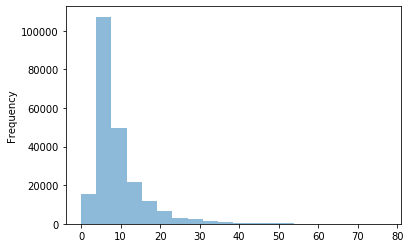

In [15]:
# take a look at the time distribution for response time
response_df['response_time'].astype('timedelta64[m]').plot.hist(bins=20, alpha=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c0a73789b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c0a73da0f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c0a7378860>],
 'medians': [<matplotlib.lines.Line2D at 0x2c0a73da780>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c0a73daac8>],
 'means': []}

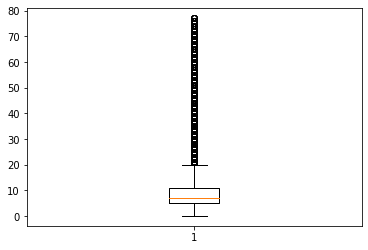

In [16]:
# assess boxplot for outliers
plt.boxplot(response_df['response_time'].astype('timedelta64[m]'))

### Data using range of 1 second to 86,400 seconds (24 hours)

In [17]:
# reduce data to response times of at least 1 second up to 1440 minutes
response2_df = refined_df[refined_df['response_time'] >= pd.Timedelta(1, 's')]
response2_df = response2_df[response2_df['response_time'] <= pd.Timedelta(1, 'd')]
response2_df = response2_df[response2_df['response_time'] <= pd.Timedelta(86400, 's')]
response2_df.head()

,call_date,battalion,received_dttm,on_scene_dttm,month,response_time
0,2020-03-14,B09,2020-03-14 20:12:02,2020-03-14 20:32:18,2020-03,00:20:16
1,2020-03-14,B03,2020-03-14 16:35:48,2020-03-14 16:55:40,2020-03,00:19:52
2,2020-03-14,B03,2020-03-14 11:53:29,2020-03-14 11:59:05,2020-03,00:05:36
3,2020-03-14,B03,2020-03-14 10:40:40,2020-03-14 10:52:42,2020-03,00:12:02
4,2020-03-14,B02,2020-03-14 18:29:15,2020-03-14 18:41:05,2020-03,00:11:50


In [18]:
# statistical summary
response2_df.describe()

,response_time
count,222932
mean,0 days 00:10:19.755508
std,0 days 00:18:59.422953
min,0 days 00:00:02
25%,0 days 00:05:33
50%,0 days 00:07:29
75%,0 days 00:11:23
max,0 days 23:54:49


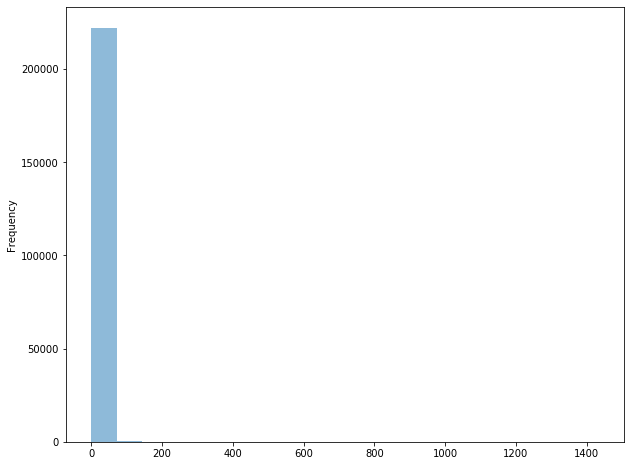

In [19]:
# take a look at the time distribution for response time
response2_df['response_time'].astype('timedelta64[m]').plot.hist(bins=20, alpha=0.5, figsize=(10, 8))

{'whiskers': [<matplotlib.lines.Line2D at 0x2c0a7994390>,
 'caps': [<matplotlib.lines.Line2D at 0x2c0a7994a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c0a7994240>],
 'medians': [<matplotlib.lines.Line2D at 0x2c0a79b5160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c0a79b54a8>],
 'means': []}

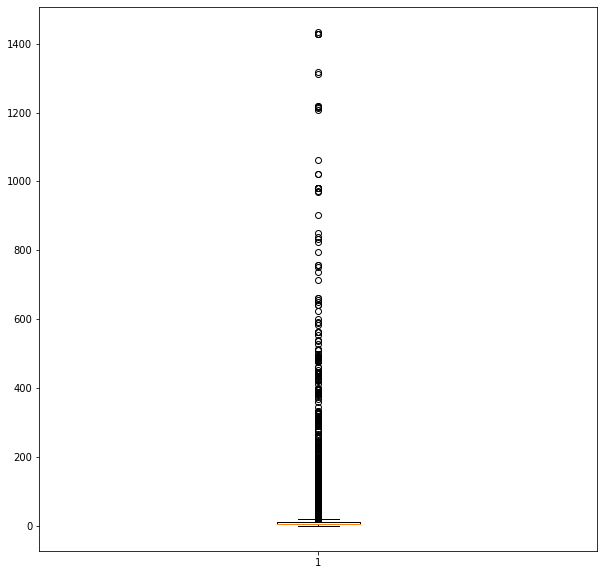

In [20]:
# assess boxplot for outliers
plt.figure(figsize=(10, 10))
plt.boxplot(response2_df['response_time'].astype('timedelta64[m]'))

Looking at the boxplots for the two data ranges, I am choosing to move forward with the dataset ranging from 1 second to 24 hours.  There are too many datapoints beyond the quantile ranges to omit while retaining the data integrity.  Without understand the dataset better or what can explain the skew in response times I feel it best to maintain the larger dataset.  

## Preparing the CSV table for the 90th percentile of call response times

In [21]:
# Format the response time data for analysis using groupby
grouping_df = response2_df.copy()
grouping_df["response_time"] = grouping_df.loc[:, "response_time"].astype('timedelta64[s]')

# Group data by month and battalion
gb = grouping_df.groupby(['month', 'battalion'])
# gb['response_time'].mean()

In [22]:
# Create new dataframe using grouped object
Response_Time_df = gb['response_time'].quantile(0.9).reset_index()
Response_Time_df.head()

,month,battalion,response_time
0,2020-03,B01,980.0
1,2020-03,B02,939.8
2,2020-03,B03,1088.2
3,2020-03,B04,902.8
4,2020-03,B05,993.8


In [23]:
# Round response time to nearest tenth
Response_Time_df['response_time'] = round(Response_Time_df['response_time'], 1)

In [24]:
# statistical summary
Response_Time_df.describe()

,response_time
count,144.000000
mean,1096.176389
std,165.796706
min,805.500000
25%,998.150000
50%,1093.100000
75%,1148.850000
max,2542.000000


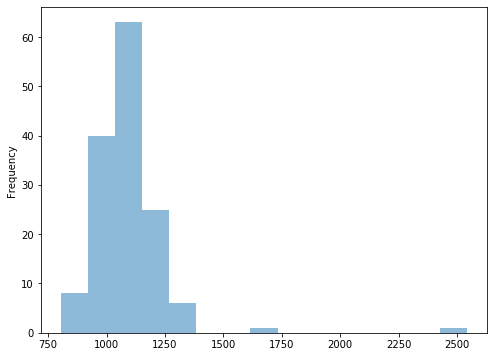

In [25]:
# histogram
Response_Time_df['response_time'].plot.hist(bins=15, alpha=0.5, figsize=(8, 6))

{'whiskers': [<matplotlib.lines.Line2D at 0x2c0a7ebe828>,
 'caps': [<matplotlib.lines.Line2D at 0x2c0a7ebeeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c0a7ebe518>],
 'medians': [<matplotlib.lines.Line2D at 0x2c0a7fa1588>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c0a7fa18d0>],
 'means': []}

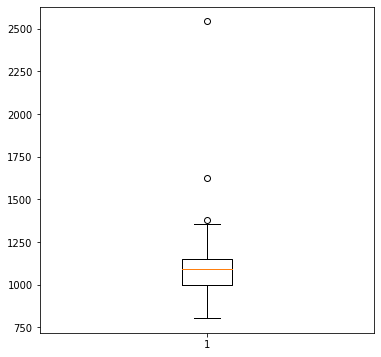

In [26]:
# boxplot
plt.figure(figsize=(6, 6))
plt.boxplot(Response_Time_df['response_time'])

In [27]:
Response_Time_df = Response_Time_df.rename(columns={'month':'Month', 
                                                    'battalion':'Battalion', 
                                                    'response_time':'90th Percentile Response Time (s)'})

In [28]:
# Export the dataframe to a csv file named "SFFD_ResponseTime.csv"
Response_Time_df.to_csv("SFFD_ResponseTime.csv", encoding='utf-8', index=False)